# Visualizations of Dataset
This notebook serves as a quick analyzation of the provided dataset in terms of statistics and key features.

## Load Dataset

In [1]:
# Imports
import pandas as pd

In [2]:
# Load data
gender_df = pd.read_csv("data/train_orig.csv")
test_df = pd.read_csv("data/test.csv")

# Extract time features
gender_df["datetime"] = pd.to_datetime(gender_df["timestamp"])
gender_df["hour"] = gender_df["datetime"].dt.hour
gender_df["month"] = gender_df["datetime"].dt.month

test_df["datetime"] = pd.to_datetime(test_df["timestamp"])
test_df["hour"] = test_df["datetime"].dt.hour
test_df["month"] = test_df["datetime"].dt.month

# Extract female and male subsets from training data
male_df = gender_df[gender_df["gender"] == "m"]
female_df = gender_df[gender_df["gender"] == "f"]

In [3]:
gender_df.head()

,user_id,path,timestamp,gender,datetime,hour,month
0,c8f04f6b-d9b6-4f4a-ad36-f56c76e79722,b3a1716e-4b53-47f9-80fd-d8eb06b10a9b,2017-01-01T00:02:09,m,2017-01-01 00:02:09,0,1
1,2963e74b-aa59-40dd-a84d-c6b5330eb303,95035d58-1878-42e3-ad44-8d4a47166cbb,2017-01-01T00:03:49,f,2017-01-01 00:03:49,0,1
2,2963e74b-aa59-40dd-a84d-c6b5330eb303,89e040d0-cb75-4470-95ec-7e935875dd63,2017-01-01T00:03:52,f,2017-01-01 00:03:52,0,1
3,2963e74b-aa59-40dd-a84d-c6b5330eb303,f713c708-8df1-4d26-94de-7a7ad9532c1f,2017-01-01T00:03:54,f,2017-01-01 00:03:54,0,1
4,2963e74b-aa59-40dd-a84d-c6b5330eb303,426fcbdf-6361-4182-8e6f-8c737da4f342,2017-01-01T00:04:10,f,2017-01-01 00:04:10,0,1


In [4]:
print(f"NaN values in train/val data: {gender_df.isnull().values.any()}") # No nan values in train/val data
print(f"NaN values in test data: {test_df.isnull().values.any()}") # No nan values in test data

NaN values in train/val data: False
NaN values in test data: False


## General Statistics

In [5]:
n_data_train_val, n_data_test = len(gender_df), len(test_df)
n_users_train_val, n_users_test = gender_df["user_id"].nunique(), test_df["user_id"].nunique()
n_websites_train_val, n_websites_test = gender_df["path"].nunique(), test_df["path"].nunique()
n_males_train_val = (gender_df.gender.values == 'm').sum()
n_females_train_val = n_data_train_val - n_males_train_val

# Statistics
print(f"Number of entries (TrainVal/Test): {format(n_data_train_val, ',d')}/{format(n_data_test, ',d')}")
print(f"Number of unique users (TrainVal/Test): {format(n_users_train_val, ',d')}/{format(n_users_test, ',d')}")
print(f"Number of unique websites (TrainVal/Test): {format(n_websites_train_val, ',d')}/{format(n_websites_test, ',d')}")
print(f"Ratio of male/female: {n_males_train_val/n_data_train_val*100:.2f}/{n_females_train_val/n_data_train_val*100:.2f}")

Number of entries (TrainVal/Test): 2,403,279/275,840
Number of unique users (TrainVal/Test): 13,513/1,487
Number of unique websites (TrainVal/Test): 26,394/26,392
Ratio of male/female: 30.02/69.98


## TrainVal/Test Statistics

In [6]:
def comp_df(df_a, df_b, key, bar=False, norm=False, xlabel=None, ylabel=None, title=None, legend=["TrainVal Set", "Test Set"], x_visible=True):
    count_df_a = df_a[key].value_counts().rename_axis(key).reset_index(name=f"count_{key}_df_a")
    count_df_b = df_b[key].value_counts().rename_axis(key).reset_index(name=f"count_{key}_df_b")
    
    if norm:
        count_df_a[f"count_{key}_df_a"] /= df_a.shape[0] * 0.01
        count_df_b[f"count_{key}_df_b"] /= df_b.shape[0] * 0.01

    merged_counts = pd.merge(count_df_a, count_df_b, on=key, how="outer").fillna(0)

    if key != "path":
        merged_counts = merged_counts.sort_values(by=key).reset_index(drop=True)
        

    print(merged_counts.head())

    if bar:
        axs1 = merged_counts.plot.bar(x=key)
    else:
        axs1 = merged_counts[f"count_{key}_df_a"].plot()
        axs2 = merged_counts[f"count_{key}_df_b"].plot()
    x_axis = axs1.axes

    if not x_visible:
        x_axis.tick_params(axis="x", colors="white")
    if title:
        axs1.set_title(title)
    if xlabel:
        axs1.set_xlabel(xlabel)
    if ylabel:
        axs1.set_ylabel(ylabel)
    if legend:
        axs1.legend(legend)
    axs1.grid()

                                   path  count_path_df_a  count_path_df_b
0  aaf5e1a2-b3e7-4f50-bfee-5cc30ad32c87              141             17.0
1  13d87662-03b0-48ec-abf5-250f5186ee62              141             17.0
2  e5eecc53-3173-437d-82db-cce0b5e31a8b              138             11.0
3  d275ed54-f38c-437d-8eb0-d09957dbefa3              137              9.0
4  4bdd3693-cd32-446c-85d4-e59ed700bc4b              136              9.0


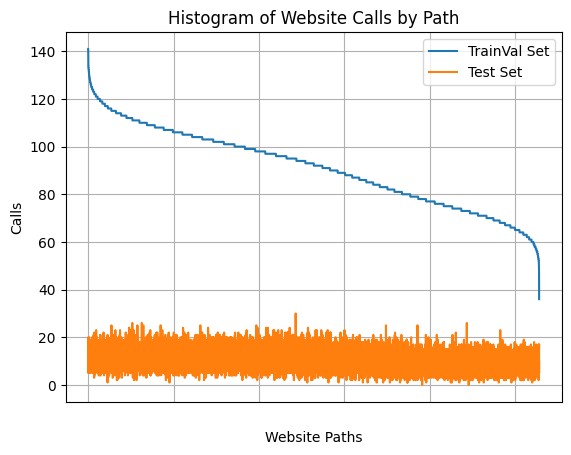

In [7]:
comp_df(
    gender_df,
    test_df,
    "path",
    xlabel="Website Paths",
    ylabel="Calls",
    title="Histogram of Website Calls by Path",
    x_visible=False
    )

   hour  count_hour_df_a  count_hour_df_b
0     0         4.187113         4.226001
1     1         4.220941         4.260441
2     2         4.283315         4.173434
3     3         4.318392         4.239052
4     4         4.339696         4.322433


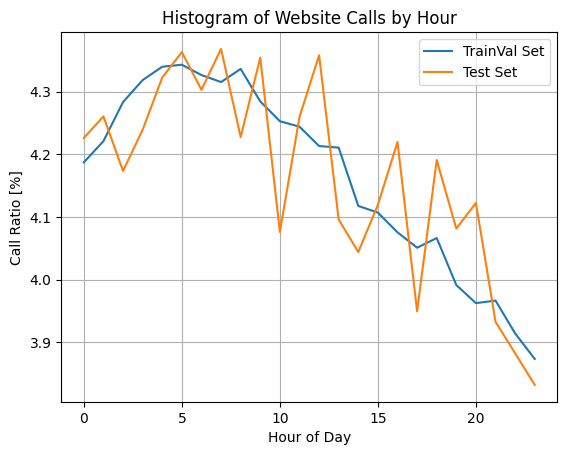

In [8]:
comp_df(
    gender_df,
    test_df,
    "hour",
    norm=True,
    bar=False,
    xlabel="Hour of Day",
    ylabel="Call Ratio [%]",
    title="Histogram of Website Calls by Hour"
    )

   month  count_month_df_a  count_month_df_b
0      1         96.790884         95.635876
1      2          2.475410          3.406323
2      3          0.594022          0.742097
3      4          0.128366          0.215705
4      5          0.011318          0.000000


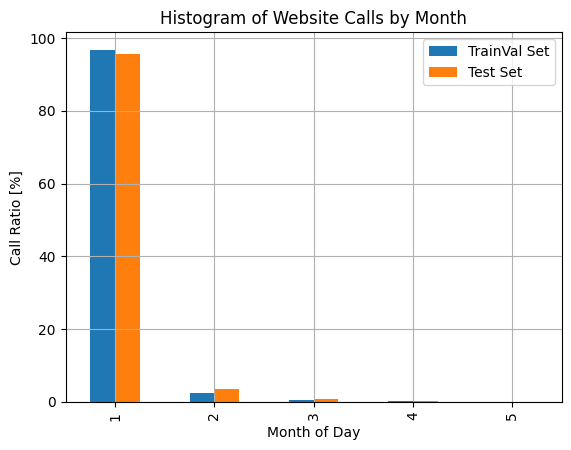

In [9]:
comp_df(
    gender_df,
    test_df,
    "month",
    norm=True,
    bar=True,
    xlabel="Month of Day",
    ylabel="Call Ratio [%]",
    title="Histogram of Website Calls by Month"
    )

## Male/Female Statistics

                                   path  count_path_df_a  count_path_df_b
0  0bad6764-6820-4d44-b749-74d26e78320b             91.0               15
1  7b62a15d-34a1-4c87-b8d1-2af832960b3c             87.0               18
2  0a573dfb-3c9a-4d97-98f5-7481bf17b3a8             86.0               26
3  3b0d579e-d0a7-424b-a839-fb4690cb5f5e             86.0               24
4  126f03cf-d3d1-4538-8d37-cd12c7de901c             85.0               15


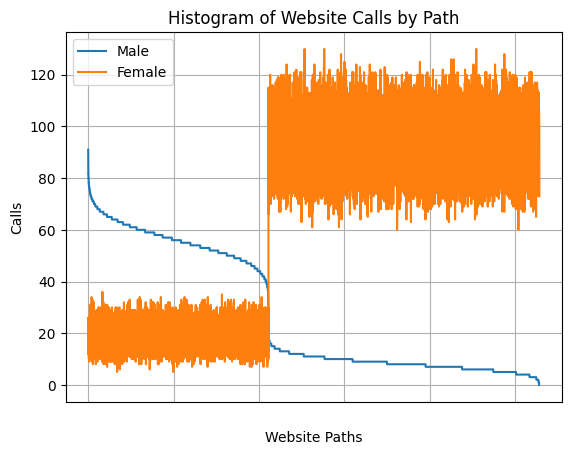

In [10]:
comp_df(
    male_df,
    female_df,
    "path",
    norm=False,
    bar=False,
    xlabel="Website Paths",
    ylabel="Calls",
    title="Histogram of Website Calls by Path",
    legend=["Male", "Female"],
    x_visible=False
    )

   hour  count_hour_df_a  count_hour_df_b
0     0         4.196852         4.182934
1     1         4.164975         4.244953
2     2         4.333093         4.261959
3     3         4.347645         4.305841
4     4         4.410291         4.309409


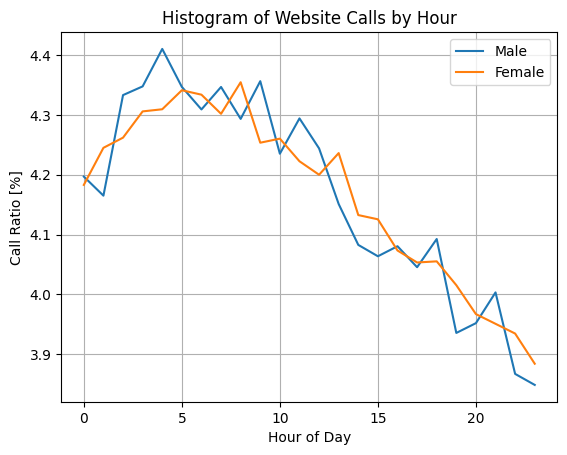

In [11]:
comp_df(
    male_df,
    female_df,
    "hour",
    norm=True,
    bar=False,
    xlabel="Hour of Day",
    ylabel="Call Ratio [%]",
    title="Histogram of Website Calls by Hour",
    legend=["Male", "Female"]
    )

   month  count_month_df_a  count_month_df_b
0      1         96.784275         96.793720
1      2          2.613521          2.416156
2      3          0.548982          0.613345
3      4          0.053221          0.160605
4      5          0.000000          0.016174


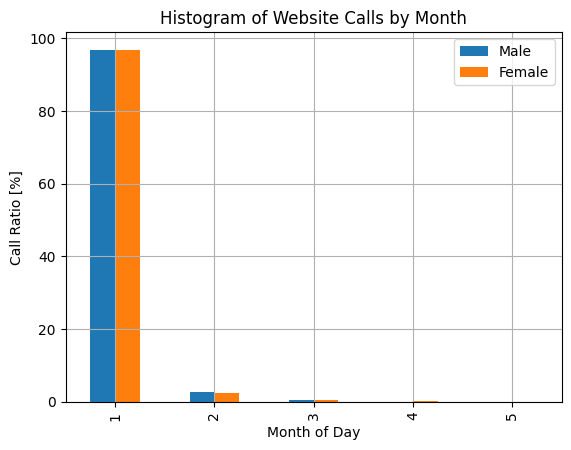

In [12]:
comp_df(
    male_df,
    female_df,
    "month",
    norm=True,
    bar=True,
    xlabel="Month of Day",
    ylabel="Call Ratio [%]",
    title="Histogram of Website Calls by Month",
    legend=["Male", "Female"]
    )

## Train/Val Split

In [13]:
def train_val_split(df, split_ratio):
    """Train/val split that keeps user_ids distinct between train and val"""
    split_index = int(split_ratio * len(df))
    while df["user_id"].iloc[split_index] == df["user_id"].iloc[split_index-1]:
        split_index -= 1

    df_train = df.iloc[:split_index]
    df_val = df.iloc[split_index:]

    return df_train, df_val

In [14]:
# Extract female and male subsets from training data
gender_df = gender_df.drop(["datetime", "hour", "month"], axis=1)

f_df = gender_df[gender_df["gender"] == "f"].sort_values(by=["user_id"])
m_df = gender_df[gender_df["gender"] == "m"].sort_values(by=["user_id"])

# Split into train and val set
f_train_df, f_val_df = train_val_split(f_df, 0.8)
m_train_df, m_val_df = train_val_split(m_df, 0.8)

# Concatenate train sets and val sets
train_df = pd.concat([f_train_df, m_train_df])
val_df = pd.concat([f_val_df, m_val_df])

## Data Integrity

Check occurrence of paths

In [15]:
if val_df["path"].isin(train_df["path"]).all():
    print("All paths of validatation set in train set.")
else:
    print("Not all paths of validatation set in train set.")

if test_df["path"].isin(train_df["path"]).all():
    print("All paths of test set in train set.")
else:
    print("Not all paths of test set in train set.")

All paths of validatation set in train set.
All paths of test set in train set.


In [16]:
from sklearn.utils import shuffle

# Shuffle datasets
train_df = shuffle(train_df)
val_df = shuffle(val_df)

# Save datasets as .csv files
train_df.to_csv("data/train.csv", index=False)
val_df.to_csv("data/val.csv", index=False)